In [1]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
import numpy
import numpy as np
import csv
import sklearn
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import SGD
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras import optimizers
from keras import backend as K
import random
import h5py
import scipy.io as sio
import pandas as pd
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


/home/heng/tfcpu/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/heng/tfcpu/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import pandas as pd
import numpy as np
seq_len=14
data_dim=4
data_raw=pd.read_csv('train.csv')
data_x=data_raw.sequence.values.tolist()
num_sample=len(data_x)
data_y=data_raw.label.values.tolist()
X_train=np.zeros([num_sample,seq_len,data_dim])
Y_train=np.zeros(num_sample)
i=0
for sample in data_x:
    j=0
    for character in sample:
        if character == 'A':
            X_train[i,j,0]=1
        if character == 'C':
            X_train[i,j,1]=1
        if character == 'G':
            X_train[i,j,2]=1
        if character == 'T':
            X_train[i,j,3]=1
        j=j+1
    Y_train[i]=data_y[i]
    i=i+1
    
index=np.arange(len(X_train))
np.random.shuffle(index)
X_train=X_train[index,:,:]
Y_train=Y_train[index]

In [3]:
X_train.shape

(2000, 14, 4)

In [4]:
optm=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [5]:
def SimpleMLP_model():
    model = Sequential()
    model.add(keras.layers.LSTM(20,input_shape=[seq_len,data_dim]))#batch_size dimension in input_shape is omitted
    model.add(Dense(10))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optm, metrics=['accuracy'])
    return model

In [14]:
model = SimpleMLP_model()
M=1900
history=model.fit(X_train[0:M,:,:], Y_train[0:M],validation_data=(X_train[M+1:1999,:,:],  Y_train[M+1:1999]), nb_epoch=30, batch_size=30)

Train on 1900 samples, validate on 98 samples
Epoch 1/30
1900/1900 [==============================] - 2s 806us/step - loss: 0.4205 - acc: 0.8195 - val_loss: 0.2808 - val_acc: 0.8980
Epoch 2/30
1900/1900 [==============================] - 1s 480us/step - loss: 0.3403 - acc: 0.8542 - val_loss: 0.2795 - val_acc: 0.8980
Epoch 3/30
1900/1900 [==============================] - 1s 469us/step - loss: 0.3393 - acc: 0.8521 - val_loss: 0.2848 - val_acc: 0.8980
Epoch 4/30
1900/1900 [==============================] - 1s 454us/step - loss: 0.3278 - acc: 0.8579 - val_loss: 0.2926 - val_acc: 0.8980
Epoch 5/30
1900/1900 [==============================] - 1s 503us/step - loss: 0.3263 - acc: 0.8574 - val_loss: 0.2849 - val_acc: 0.8980
Epoch 6/30
1900/1900 [==============================] - 1s 470us/step - loss: 0.3273 - acc: 0.8595 - val_loss: 0.2877 - val_acc: 0.9082
Epoch 7/30
1900/1900 [==============================] - 1s 478us/step - loss: 0.3253 - acc: 0.8621 - val_loss: 0.2949 - val_acc: 0.8980
Ep

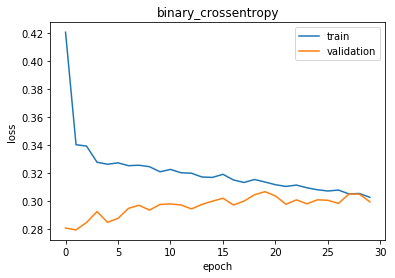

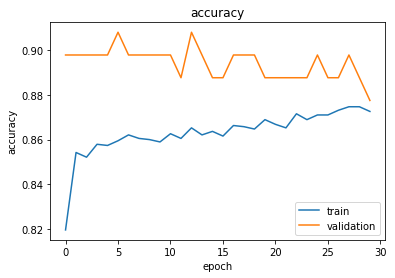

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'], loc='upper right')
plt.title('binary_crossentropy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['train','validation'], loc='lower right')
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [8]:
y_hat=model.predict(X_train)
y_hat=y_hat>0.5
confusion_matrix=sklearn.metrics.confusion_matrix(Y_train, y_hat)

In [9]:
confusion_matrix

array([[960,  40],
       [ 61, 939]])

In [10]:
data_raw=pd.read_csv('test.csv')
data_x=data_raw.sequence.values.tolist()
num_sample=len(data_x)
X_test=np.zeros([num_sample,seq_len,data_dim])
i=0
for sample in data_x:
    j=0
    for character in sample:
        if character == 'A':
            X_test[i,j,0]=1
        if character == 'C':
            X_test[i,j,1]=1
        if character == 'G':
            X_test[i,j,2]=1
        if character == 'T':
            X_test[i,j,3]=1
        j=j+1
    i=i+1

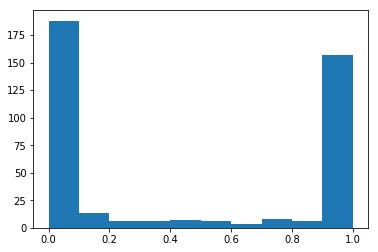

In [11]:
y_predict=model.predict(X_test)
y_predict=y_predict[:,0]
plt.hist(y_predict)
index=np.arange(len(y_predict))

In [12]:
y_predict.shape

(400,)

In [13]:
dataframe = pd.DataFrame({'id':index,'prediction':y_predict})
dataframe.to_csv("output_lstm.csv",index=False,sep=',')